Analysis to determine the amount of honey production from 2006 to 2017 in México, Campeche and Hopelchén

In [8]:
import pandas as pd
import glob, os

import all csv retrieved from the Ministry of Agricultural data http://infosiap.siap.gob.mx/gobmx/datosAbiertos.php

In [3]:
path = r'/Users/dianabaptistarojo/Documents/Columbia/masters_project/honey_data'                   
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f, encoding='latin-1') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)

In [9]:
concatenated_df.head()

,Anio,Cveestado,Nomestado,Cveddr,Nomddr,Cvempio,Nommunicipio,Cveespecie,Nomespecie,Cveproducto,Nomproducto,Volumen,Peso,Precio,Valor,Asacrificado
0,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Abeja,7.0,Miel,182.698,0.000,39.50,7216.571,0.0
1,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,3.0,Ave,1.0,Carne,75601.360,1.500,28.42,2148590.651,50400899.0
2,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,3.0,Ave,4.0,Huevo-plato,2732.270,0.000,22.35,61066.235,0.0
3,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,3.0,Ave,8.0,Ganado en pie,100801.798,2.000,19.04,1919266.234,0.0
4,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,4.0,Bovino,1.0,Carne,5685.010,237.538,53.24,302640.710,23933.0


export the data to a single csv

In [7]:
concatenated_df.to_csv('total_data_livestock.csv', index=False)

look for information only concerning honey production

In [12]:
honey_production = concatenated_df.loc[concatenated_df['Nomproducto'] == 'Miel']
honey_production.head()

,Anio,Cveestado,Nomestado,Cveddr,Nomddr,Cvempio,Nommunicipio,Cveespecie,Nomespecie,Cveproducto,Nomproducto,Volumen,Peso,Precio,Valor,Asacrificado
0,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Aguascalientes,1.0,Abeja,7.0,Miel,182.698,0.0,39.5,7216.571,0.0
13,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,2.0,Asientos,1.0,Abeja,7.0,Miel,47.469,0.0,40.0,1898.760,0.0
26,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,3.0,Calvillo,1.0,Abeja,7.0,Miel,18.552,0.0,40.0,742.080,0.0
36,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,4.0,Cosío,1.0,Abeja,7.0,Miel,27.402,0.0,40.0,1096.080,0.0
49,2014.0,1.0,Aguascalientes,1.0,Aguascalientes,5.0,Jesús María,1.0,Abeja,7.0,Miel,30.411,0.0,40.5,1231.646,0.0


look into the volume of honey production per state and per year

In [16]:
honey_production_by_state = honey_production.groupby(['Nomestado', 'Anio']).sum()['Volumen'].reset_index()

In [17]:
honey_production_by_state

,Nomestado,Anio,Volumen
0,Aguascalientes,2006.0,430.438
1,Aguascalientes,2007.0,197.365
2,Aguascalientes,2008.0,331.315
3,Aguascalientes,2009.0,396.400
4,Aguascalientes,2010.0,270.000
5,Aguascalientes,2011.0,217.450
6,Aguascalientes,2012.0,326.488
7,Aguascalientes,2013.0,371.379
8,Aguascalientes,2014.0,551.495
9,Aguascalientes,2015.0,616.053


export the honey production data to a new csv

In [18]:
honey_production_by_state.to_csv('honey_production_by_state.csv', index=False)

look at the total honey production by year

In [19]:
year_honey = honey_production_by_state.groupby('Anio')['Volumen'].sum().reset_index()
year_honey

,Anio,Volumen
0,2006.0,55969.723
1,2007.0,55459.336
2,2008.0,59682.174
3,2009.0,56071.020
4,2010.0,55684.128
5,2011.0,57782.946
6,2012.0,58601.720
7,2013.0,56906.812
8,2014.0,60624.366
9,2015.0,61881.117


In [20]:
%matplotlib inline

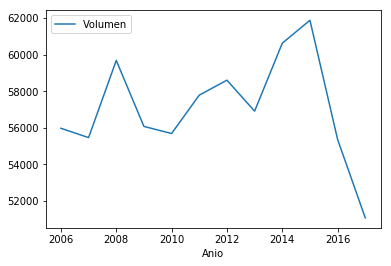

In [21]:
year_honey.plot(x='Anio', y='Volumen', kind='line')

look at honey production by year in Campeche

In [22]:
honey_camp = honey_production_by_state.loc[honey_production_by_state['Nomestado'] == 'Campeche']
honey_camp

,Nomestado,Anio,Volumen
36,Campeche,2006.0,6015.920
37,Campeche,2007.0,8205.630
38,Campeche,2008.0,8816.567
39,Campeche,2009.0,7005.792
40,Campeche,2010.0,5434.680
41,Campeche,2011.0,8344.476
42,Campeche,2012.0,7715.634
43,Campeche,2013.0,5715.408
44,Campeche,2014.0,7083.125
45,Campeche,2015.0,7735.818


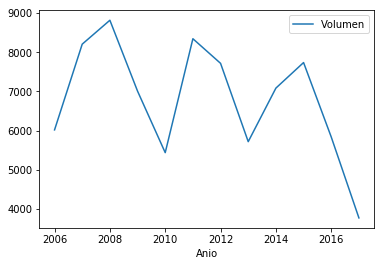

In [23]:
honey_camp.plot(x='Anio', y='Volumen', kind='line')

In [24]:
honey_camp.to_csv('honey_data_Campeche.csv', index=False)